In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def load_dataset(filepath='data/',print_ind=False):
    columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','target']
    train = pd.read_csv("data/train.txt",names=columns)
    test = pd.read_csv("data/test.txt",names=columns[:-1])
    
    train['target'].replace(' <=50K',-1,inplace=True)
    train['target'].replace(' >50K',1,inplace=True)  
    label=np.array(train['target']).reshape(len(train['target']),1)
    train.drop('target',axis=1,inplace=True)
    train = np.array(train)
    test = np.array(test)
    label = label.astype(int)
    if (print_ind):
        print ("Train Shape: {} Test Shape{}".format(train.shape,test.shape))
    return train,test,label

def preprocessing(data):
    #train,test,label=load_dataset()
    train=extract_contineous(data)
    #test=extract_contineous(test)
    train_scale=feature_scaling(train)
    test_scale=feature_scaling(test)
    train_with_label = np.append(train_scale,label,axis=1)
    return train_with_label,test_scale

def extract_contineous(data):
    cont_columns = [0,2,4,10,11,12]
    return (data[:,cont_columns]).astype(float)


def feature_scaling(data,print_ind=False):
    feature_mean=data.mean(axis=0).astype(float)
    feature_var =data.var(axis=0).astype(float)
    data = (data - feature_mean) / np.sqrt(feature_var)
    if (print_ind):
        print ("Scale Shape:{}".format(input_df_scale.shape))
    return data

def penalty_term(a):
    return 1/2 * np.asscalar(np.transpose(a).dot(a))

def obj_func(a,b,data):
    obj = np.dot(a.T,data)+b
    return obj


def gradient_calc(w,lam,data):
    X = data[:-1]
    y = data[-1]
    a = w[:-1]
    b = w[-1]
    diff = y * obj_func(a,b,X)
    a_delta = np.array([])
    b_delta = 0
    if (diff >= 1):
        a_delta = lam*a
        b_delta = 0
    else:
        a_delta = np.subtract(lam * a, (y * X).reshape(6, 1))
        b_delta = -y
    gradient = (np.append(np.array(a_delta), np.array([b_delta]))).reshape(7, 1)
    return gradient
    
    
def cost_function(w,lam,data):
    a = w[:-1]
    b = w[-1:]
    m=len(data)  
    temp_max_val=0
    
    for e in data:
        X = e[:-1]
        y = e[-1:]
        obj = obj_func(a,b,X)
        error = 1 - y * obj
        temp_max_val+=max(0, np.asscalar(error))
        
    max_val = ((1/m)*temp_max_val) + lam * penalty_term(a)
    return max_val


def pred_calc(w,X):
    a = w[:-1]
    b = w[-1][0]
    obj = obj_func(a,b,X)
    pred = np.sign(obj)[0]
    return pred


def evaluate_model(w,lam,data):
    num_correct = 0
    for d in data:
        X = d[:-1]
        y = d[-1]
        pred = pred_calc(w,X)
        if (pred == y):
            num_correct += 1
    return (num_correct/len(data))


def train_test_split(data,eval_percent):
    np.random.shuffle(data)
    end_loc = len(data)//eval_percent
    eval_data=data[:end_loc]
    train_data=data[end_loc:]
    return train_data,eval_data


def train_model(train):
    w = np.random.rand(7,1) #initialize weight
    weight_cost = {}
    step_count=0
    num_epochs = 50 #initialize number of epochs
    num_steps = 300 #initialize number of steps
    #l_rate = 0.001 #initialize learning rate
    #l_rate = (1/(0.01*i+50))
    costs = []
    accuracy_step_wise = []
    accuracy_lam_wise = []
    #train,test=preprocessing()
    np.random.shuffle(train) # Shuffle train Dataset
    train_set,eval_set=train_test_split(train,10) #|--10%(valid_set)---|-----------------90%(train_set)-----------------|
    epoch_data = train_set[:50]  #|-(50 epoch_data)--|--------------90%-50 Example(train_data)-----------------|
    train_data = train_set[50:]  #|-(50 epoch_data)--|--------------90%-50 Example(train_data)-----------------|
    for l in [1e-5,1e-4,1e-3,1e-2,1e-1,1]:
        for i in range(num_epochs):
            for j in range(num_steps):
                step_count += 1
                gradient = gradient_calc(w,l,train_data[j])
                l_rate = (1/(0.01*i+100))
                step = l_rate * gradient
                w = np.subtract(w, step)
                if (step_count % 30 == 0): #Each Step = 30
                    acuuracy_step=evaluate_model(w,l,epoch_data) #Each Step Level (epoch_data)
                    cost_step = cost_function(w, l, epoch_data) #Each Step Level (epoch_data)
                    accuracy_step_wise.append([l,step_count,acuuracy_step,np.sqrt(np.sum(w[:-1]**2)),cost_step]) #Each Step Level
            np.random.shuffle(train_set) #|-----------------90%(train_set)(Shuffle)-----------------|
            epoch_data = train_set[:50]  #|-(50 epoch_data)--|--------------90%-50 Example(train_data)-----------------|
            train_data = train_set[50:]  #|-(50 epoch_data)--|--------------90%-50 Example(train_data)-----------------|
        acuuracy_lam=evaluate_model(w,l,eval_set) #Each lamda level (epoch_data)
        cost_lam = cost_function(w, l, eval_set) #Each lambda level (epoch_data)
        weight_cost[l] = {'W':w,'Accuracy':acuuracy_lam, 'Cost':cost_lam}        
        accuracy_lam_wise.append([l,step_count,acuuracy_lam,np.sqrt(np.sum(w[:-1]**2)),cost_lam]) #Each Step Level
        step_count=0
        np.random.shuffle(train) # Shuffle train Dataset
        train_set,eval_set=train_test_split(train,10) #|--10%(valid_set)---|-----------------90%(train_set)-----------------|
        epoch_data = train_set[:50]  #|-(50 epoch_data)--|--------------90%-50 Example(train_data)-----------------|
        train_data = train_set[50:]  #|-(50 epoch_data)--|--------------90%-50 Example(train_data)-----------------|
        w = np.random.rand(7,1) #initialize weight
    #step_accuracy=np.array(accuracy_step_wise)
    #lam_accuracy=np.array(accuracy_lam_wise)
    #return step_accuracy,lam_accuracy
    return accuracy_step_wise,accuracy_lam_wise,weight_cost



def plot_val_accuracy(step_accuracy):
    plt.subplots(figsize=(20,8))
    plt.plot(step_accuracy[step_accuracy[:,0] == 0.00001][:,1],step_accuracy[step_accuracy[:,0] == 0.0001][:,2],color='black')
    plt.plot(step_accuracy[step_accuracy[:,0] == 0.0001][:,1],step_accuracy[step_accuracy[:,0] == 0.0001][:,2],color='purple')
    plt.plot(step_accuracy[step_accuracy[:,0] == 0.001][:,1],step_accuracy[step_accuracy[:,0] == 0.001][:,2],color='red')
    plt.plot(step_accuracy[step_accuracy[:,0] == 0.01][:,1],step_accuracy[step_accuracy[:,0] == 0.01][:,2],color='green')
    plt.plot(step_accuracy[step_accuracy[:,0] == 0.1][:,1],step_accuracy[step_accuracy[:,0] == 0.1][:,2],color='blue')
    plt.plot(step_accuracy[step_accuracy[:,0] == 1][:,1],step_accuracy[step_accuracy[:,0] == 1][:,2],color='orange')
    plt.legend(['1e-5','1e-4','1e-3','1e-2','1e-1','1'])
    plt.xlabel('Steps')
    plt.ylabel('Validation Accuracy')

    
def plot_magnitude_w(step_accuracy):
    plt.subplots(figsize=(20,8))
    plt.plot(step_accuracy[step_accuracy[:,0] == 0.00001][:,1],step_accuracy[step_accuracy[:,0] == 0.00001][:,3],color='black')
    plt.plot(step_accuracy[step_accuracy[:,0] == 0.0001][:,1],step_accuracy[step_accuracy[:,0] == 0.0001][:,3],color='purple')
    plt.plot(step_accuracy[step_accuracy[:,0] == 0.001][:,1],step_accuracy[step_accuracy[:,0] == 0.001][:,3],color='red')
    plt.plot(step_accuracy[step_accuracy[:,0] == 0.01][:,1],step_accuracy[step_accuracy[:,0] == 0.01][:,3],color='green')
    plt.plot(step_accuracy[step_accuracy[:,0] == 0.1][:,1],step_accuracy[step_accuracy[:,0] == 0.1][:,3],color='blue')
    plt.plot(step_accuracy[step_accuracy[:,0] == 1][:,1],step_accuracy[step_accuracy[:,0] == 1][:,3],color='orange')
    plt.legend(['1e-5','1e-4','1e-3','1e-2','1e-1','1'])
    plt.xlabel('Steps')
    plt.ylabel('Size of w')

def pred_test(w,test):
    sr_pred_test=[]
    for data in test:
        pred_test_val=pred_calc(w,data)
        if (pred_test_val == -1):
            pred = '<=50K'
        elif(pred_test_val == 1):
            pred = '>50K'
        sr_pred_test.append(pred)
        #sr_pred_test.append(pred_test_val)
    pd.DataFrame(sr_pred_test).to_csv("submission.txt",index=False,header=False)
        

def main(show):
    train,test,label=load_dataset()
    train_contineous=extract_contineous(train)
    train_scale=feature_scaling(train_contineous)
    train_with_label = np.append(train_scale,label,axis=1)

    test_contineous=extract_contineous(test)
    test_scale=feature_scaling(test_contineous)
    #train_with_label = np.append(train_scale,label,axis=1)

    #train,test=preprocessing()
    step_accuracy,lam_accuracy,weight_cost=train_model(train_with_label)
    if (show):
        plot_val_accuracy(np.array(step_accuracy))
        plot_magnitude_w(np.array(step_accuracy))
    pred_test(pd.DataFrame(weight_cost).T.loc[0.0001].loc['W'],test_scale)
    return step_accuracy,pd.DataFrame(lam_accuracy,columns=['lam','step_count','accuracy','weight','cost']).sort_values(by='cost'),pd.DataFrame(weight_cost).T,pd.DataFrame(step_accuracy,columns=['lam','step_count','accuracy','weight','cost']).groupby('lam').mean().sort_values(by='cost')


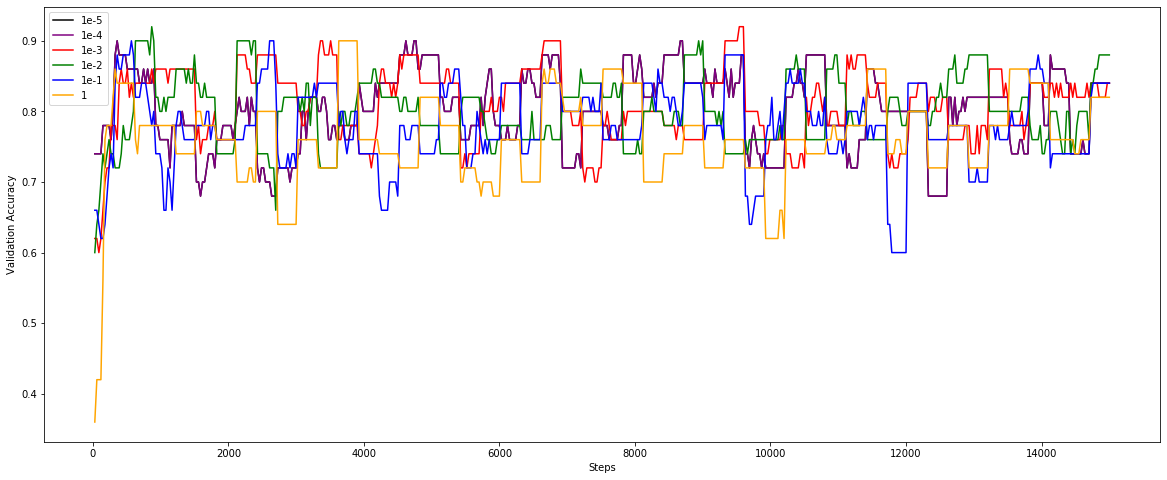

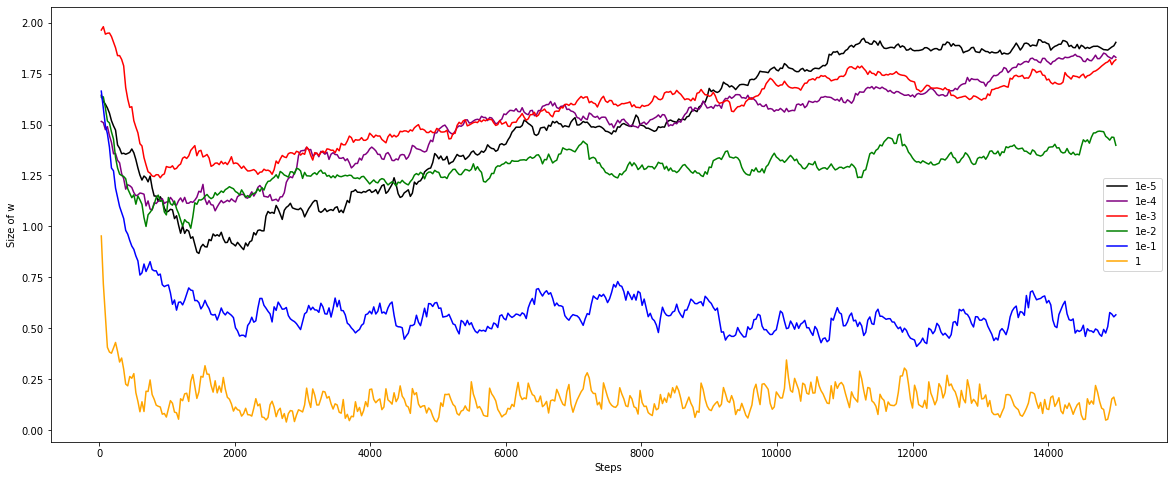

In [3]:
step_accuracy,lam_accuracy,weight_cost,mean_step_accuracy=main(True)

In [4]:
mean_step_accuracy

,step_count,accuracy,weight,cost
lam,,,,
0.00100,7515,0.81040,1.570747,0.413558
0.00010,7515,0.80100,1.503697,0.433909
0.00001,7515,0.80144,1.501947,0.442196
0.01000,7515,0.79968,1.287171,0.447744
0.10000,7515,0.78032,0.585335,0.473390
1.00000,7515,0.76324,0.154183,0.489538
